## Laboratorio 2

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
import cv2


#### Problema 1: 
Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

C:\Users\David\AppData\Local\Temp\ipykernel_14032\2144324273.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen_gris = imageio.imread(imagen, pilmode='L')


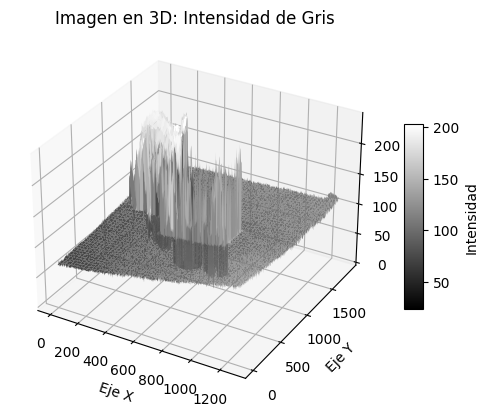

In [26]:

def mostrar_imagen_3d(imagen):
    # Leer la imagen en escala de grises
    imagen_gris = imageio.imread(imagen, pilmode='L')

    # Obtener las dimensiones de la imagen
    alto, ancho = imagen_gris.shape

    # Crear matrices de coordenadas X, Y y Z
    x = np.arange(ancho)
    y = np.arange(alto)
    x, y = np.meshgrid(x, y)
    z = imagen_gris

    # Crear una figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Crear la superficie 3D
    superficie = ax.plot_surface(x, y, z, cmap='gray')

    # Agregar una barra de color para representar la intensidad
    barra_color = fig.colorbar(superficie, ax=ax, shrink=0.5, aspect=10)
    barra_color.set_label('Intensidad')

    # Etiquetas de ejes
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Intensidad')

    # Título de la figura
    plt.title('Imagen en 3D: Intensidad de Gris')

    # Mostrar la figura
    plt.show()

# Ruta de la imagen en escala de grises
ruta_imagen = 'caset.jpg'

# Llamar a la función para mostrar la imagen en 3D
mostrar_imagen_3d(ruta_imagen)

#### Problema #2:
Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal, logaritmica y exponencial.

C:\Users\David\AppData\Local\Temp\ipykernel_14032\2818138748.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen_gris = imageio.imread(imagen, pilmode='L')


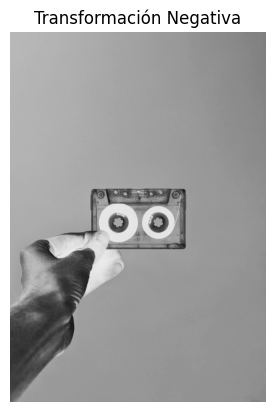

C:\Users\David\AppData\Local\Temp\ipykernel_14032\2818138748.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen_gris = imageio.imread(imagen, pilmode='L')


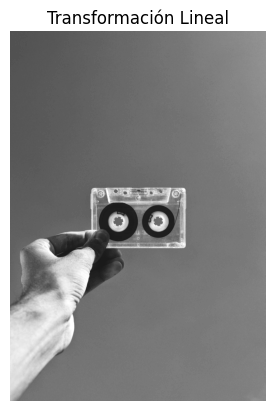

C:\Users\David\AppData\Local\Temp\ipykernel_14032\2818138748.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen_gris = imageio.imread(imagen, pilmode='L')


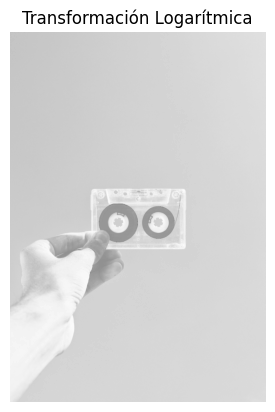

C:\Users\David\AppData\Local\Temp\ipykernel_14032\2818138748.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen_gris = imageio.imread(imagen, pilmode='L')


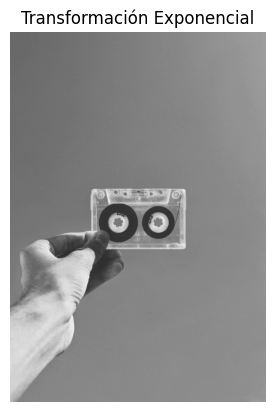

In [27]:
def negativa(imagen):
    # Leer la imagen en escala de grises
    imagen_gris = imageio.imread(imagen, pilmode='L')

    # Crear la imagen negativa
    imagen_negativa = 255 - imagen_gris

    plt.imshow(imagen_negativa, cmap='gray')
    plt.title('Transformación Negativa')
    plt.axis('off')
    plt.show()

def lineal(imagen, pendiente, interseccion):
    # Leer la imagen en escala de grises
    imagen_gris = imageio.imread(imagen, pilmode='L')

    # Aplicar la transformación lineal
    imagen_transformada = np.clip(pendiente * imagen_gris + interseccion, 0, 255).astype(np.uint8)

    plt.imshow(imagen_transformada, cmap='gray')
    plt.title('Transformación Lineal')
    plt.axis('off')
    plt.show()

def logaritmica(imagen, c):
    # Leer la imagen en escala de grises
    imagen_gris = imageio.imread(imagen, pilmode='L')

    # Aplicar la transformación logarítmica
    imagen_transformada = c * np.log(1 + imagen_gris)

    plt.imshow(imagen_transformada, cmap='gray')
    plt.title('Transformación Logarítmica')
    plt.axis('off')
    plt.show()

def exponencial(imagen, c, gamma):
    # Leer la imagen en escala de grises
    imagen_gris = imageio.imread(imagen, pilmode='L')

    # Aplicar la transformación exponencial
    imagen_transformada = c * np.power(imagen_gris, gamma)

    plt.imshow(imagen_transformada, cmap='gray')
    plt.title('Transformación Exponencial')
    plt.axis('off')
    plt.show()

# Ruta de la imagen en escala de grises
ruta_imagen = 'caset.jpg'

# Llamar a las funciones para mostrar las transformaciones
negativa(ruta_imagen)
lineal(ruta_imagen, 1.2, 0)
logaritmica(ruta_imagen, 30)
exponencial(ruta_imagen, 0.02, 0.7)

#### Problema #3:
Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [44]:
def process_images(image1_filename, image2_filename):
    # Cargar las imágenes desde la misma carpeta que el notebook
    image1 = cv2.imread(image1_filename)
    image2 = cv2.imread(image2_filename)

    # Verificar si las imágenes están vacías
    if image1 is None or image2 is None:
        print("Error: No se pudieron cargar las imágenes.")
        return

    # Convertir a escala de grises
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Binarizar las imágenes (usando umbral 128 para una binarización simple)
    _, bin_image1 = cv2.threshold(gray_image1, 128, 255, cv2.THRESH_BINARY)
    _, bin_image2 = cv2.threshold(gray_image2, 128, 255, cv2.THRESH_BINARY)

    # Asegurarse de que ambas imágenes binarizadas tengan el mismo tamaño
    min_height = min(bin_image1.shape[0], bin_image2.shape[0])
    min_width = min(bin_image1.shape[1], bin_image2.shape[1])

    bin_image1 = cv2.resize(bin_image1, (min_width, min_height))
    bin_image2 = cv2.resize(bin_image2, (min_width, min_height))


    # Realizar operaciones lógicas
    sum_result = cv2.add(bin_image1, bin_image2)
    sub_result = cv2.subtract(bin_image1, bin_image2)
    and_result = cv2.bitwise_and(bin_image1, bin_image2)
    or_result = cv2.bitwise_or(bin_image1, bin_image2)
    xor_result = cv2.bitwise_xor(bin_image1, bin_image2)

    # Guardar los resultados en la misma carpeta que el notebook
    cv2.imwrite('Suma_Result.jpg', sum_result)
    cv2.imwrite('Resta_Result.jpg', sub_result)
    cv2.imwrite('AND_Result.jpg', and_result)
    cv2.imwrite('OR_Result.jpg', or_result)
    cv2.imwrite('XOR_Result.jpg', xor_result)

    print("Resultados guardados en la carpeta del notebook.")

# Nombres de archivo de las imágenes en la misma carpeta que el notebook
image_filename1 = 'Imagen1.jpg'
image_filename2 = 'Imagen2.jpg'

process_images(image_filename1, image_filename2)

Resultados guardados en la carpeta del notebook.


#### Problema #4:
Realice una comparación entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV y cualquier imagen, como entregable debe mostrar una comparación entre los tres enfoques con una tabla donde se muestre las ventajas y desventajas de cada enfoque.

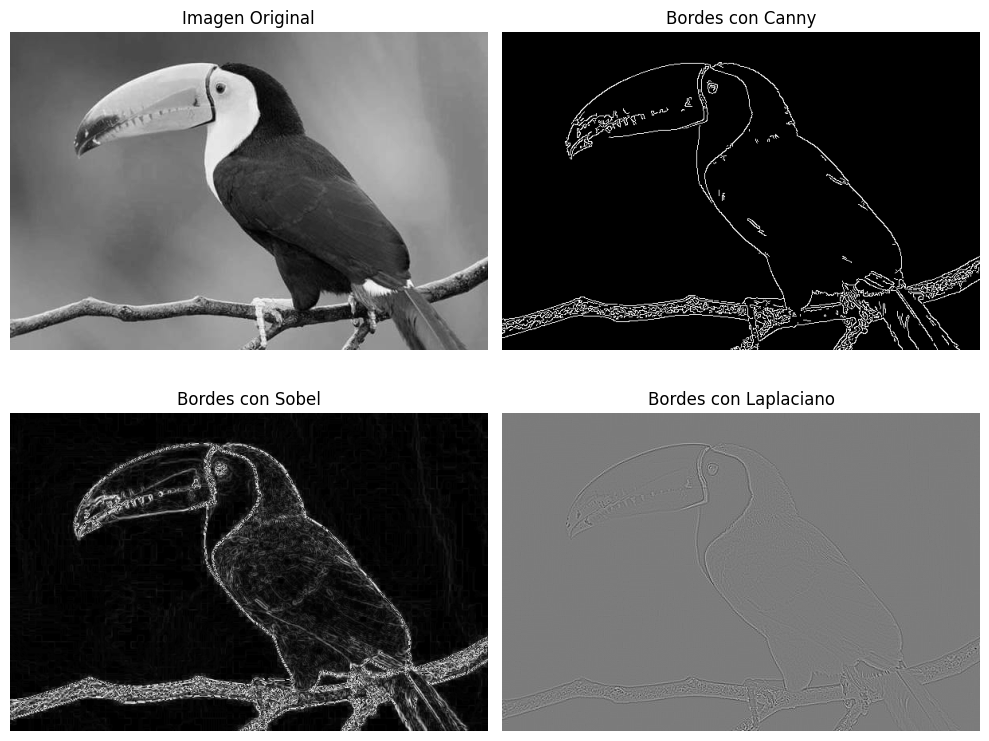

In [45]:
# Cargar la imagen
image = cv2.imread('Imagen3.jpg', cv2.IMREAD_GRAYSCALE)

# Algoritmo de Canny
edges_canny = cv2.Canny(image, 100, 200)

# Operador de Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
edges_sobel = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

# Operador Laplaciano
edges_laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Crear una figura para mostrar las imágenes
plt.figure(figsize=(10, 8))

# Mostrar la imagen original
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Mostrar bordes usando el algoritmo de Canny
plt.subplot(2, 2, 2)
plt.imshow(edges_canny, cmap='gray')
plt.title('Bordes con Canny')
plt.axis('off')

# Mostrar bordes usando el operador de Sobel
plt.subplot(2, 2, 3)
plt.imshow(edges_sobel, cmap='gray')
plt.title('Bordes con Sobel')
plt.axis('off')

# Mostrar bordes usando el operador Laplaciano
plt.subplot(2, 2, 4)
plt.imshow(edges_laplacian, cmap='gray')
plt.title('Bordes con Laplaciano')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Problema #5:
Utilizando funciones de OpenCV deberá aplicar los filtros de convolución de tamaño de kernel (3x3, 5x5 y 7x7) las operaciones que deberá realizar son las siguientes:

.Kernel Gaussiano de riodo.
.Kernel Box de ruido.
.Kernel de mediana para ruido.
.Kernel Sobel para detecci´on de bornes (en X e Y).
.Kernel Lapaciano para detecci´on de bordes.
.Kernel de realce (Sharpening).
.Kernel de relieve (Embossing)

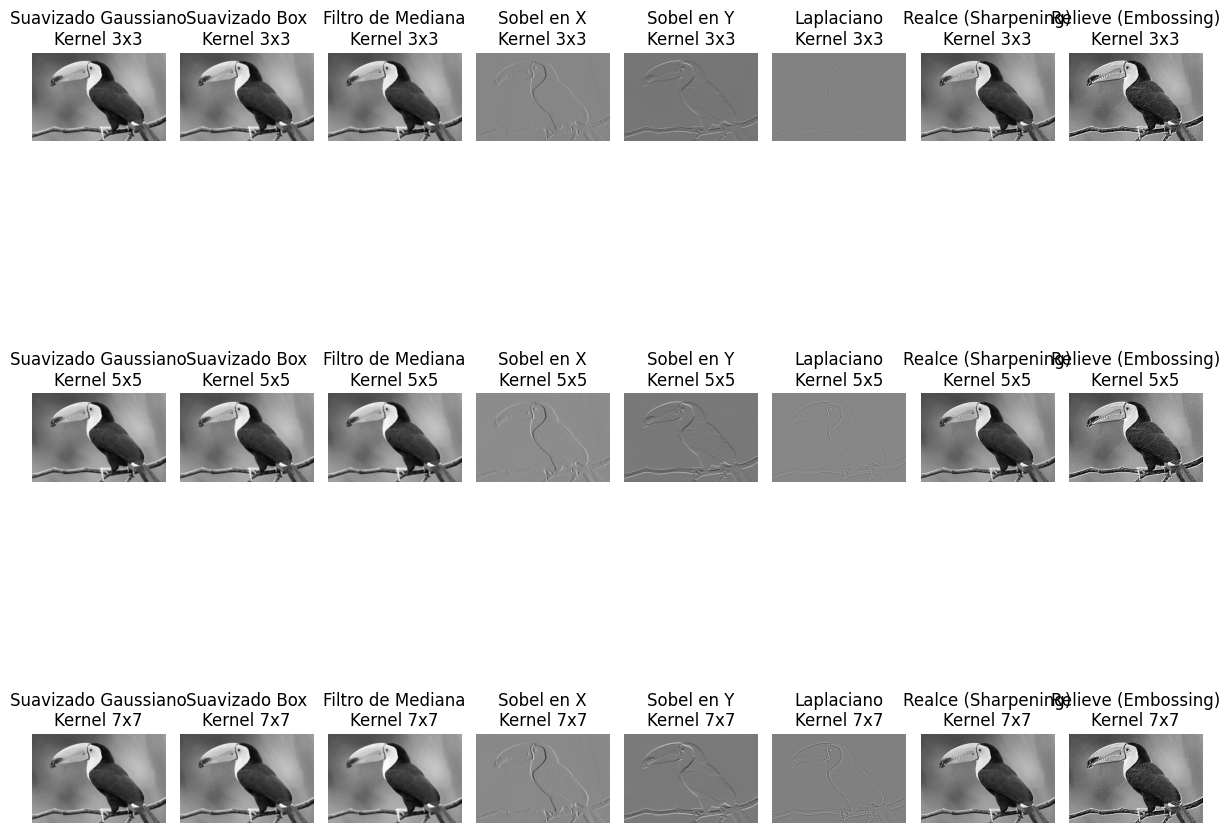

In [46]:
image = cv2.imread('Imagen3.jpg', cv2.IMREAD_GRAYSCALE)

# Definir los tamaños de kernel
kernel_sizes = [3, 5, 7]

# Definir los kernels
kernel_gaussian = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]]) / 16.0

kernel_box = np.ones((3, 3), np.float32) / 9.0

# Aplicar los filtros
results = []

for size in kernel_sizes:
    # Aplicar suavizado Gaussiano
    smoothed = cv2.filter2D(image, -1, kernel_gaussian)
    results.append(('Suavizado Gaussiano', size, smoothed))

    # Aplicar suavizado Box
    smoothed_box = cv2.filter2D(image, -1, kernel_box)
    results.append(('Suavizado Box', size, smoothed_box))

    # Aplicar filtro de mediana
    median_filtered = cv2.medianBlur(image, size)
    results.append(('Filtro de Mediana', size, median_filtered))

    # Aplicar filtro Sobel en dirección X
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=size)
    results.append(('Sobel en X', size, sobel_x))

    # Aplicar filtro Sobel en dirección Y
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=size)
    results.append(('Sobel en Y', size, sobel_y))

    # Aplicar filtro Laplaciano
    laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=size)
    results.append(('Laplaciano', size, laplacian))

    # Crear kernel de realce
    kernel_sharpen = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, kernel_sharpen)
    results.append(('Realce (Sharpening)', size, sharpened))

    # Crear kernel de relieve (embossing)
    kernel_emboss = np.array([[-2, -1, 0],
                              [-1, 1, 1],
                              [0, 1, 2]])
    embossed = cv2.filter2D(image, -1, kernel_emboss)
    results.append(('Relieve (Embossing)', size, embossed))

# Mostrar resultados en una figura
plt.figure(figsize=(12, 12))
num_results = len(results)

for i, (filter_name, size, result) in enumerate(results):
    plt.subplot(len(kernel_sizes), len(results)//len(kernel_sizes), i+1)
    plt.imshow(result, cmap='gray')
    plt.title(f'{filter_name}\nKernel {size}x{size}')
    plt.axis('off')

plt.tight_layout()
plt.show()